# Business Problem
It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# Business Requirement


In [143]:
# import packages

import os
from datetime import datetime,date

import numpy as np
import pandas as pd
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

import imblearn

from xgboost import *

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *


from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings


# set options
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

pd.set_option('max_colwidth',1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding, Preparation, and Pre-Processing

In [144]:
# import data

dataset = pd.read_csv('train.csv')

dictionary = pd.read_csv('data_dictionary.csv')

In [145]:
# dataset

dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [146]:
# dataset statistical data

dataset.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [147]:
# dataset information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [148]:
# data dictionary

dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [149]:
# data

print("total records:",dataset.shape[0])
print("total columns:",dataset.shape[1])

total records: 69999
total columns: 172


In [150]:
# drop id columns

dataset.drop(columns='id',inplace=True)

dataset.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0

-----------

# Exploratory Data Analysis

## univariate analysis

In [167]:
# target

target = 'churn_probability'
dataset[target].unique()

array([0, 1], dtype=int64)

In [171]:
# categorical columns

cat_cols = dataset.select_dtypes('object').columns

print('categorical columns in data:',len(cat_cols))

dataset[cat_cols].head()

categorical columns in data: 9


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


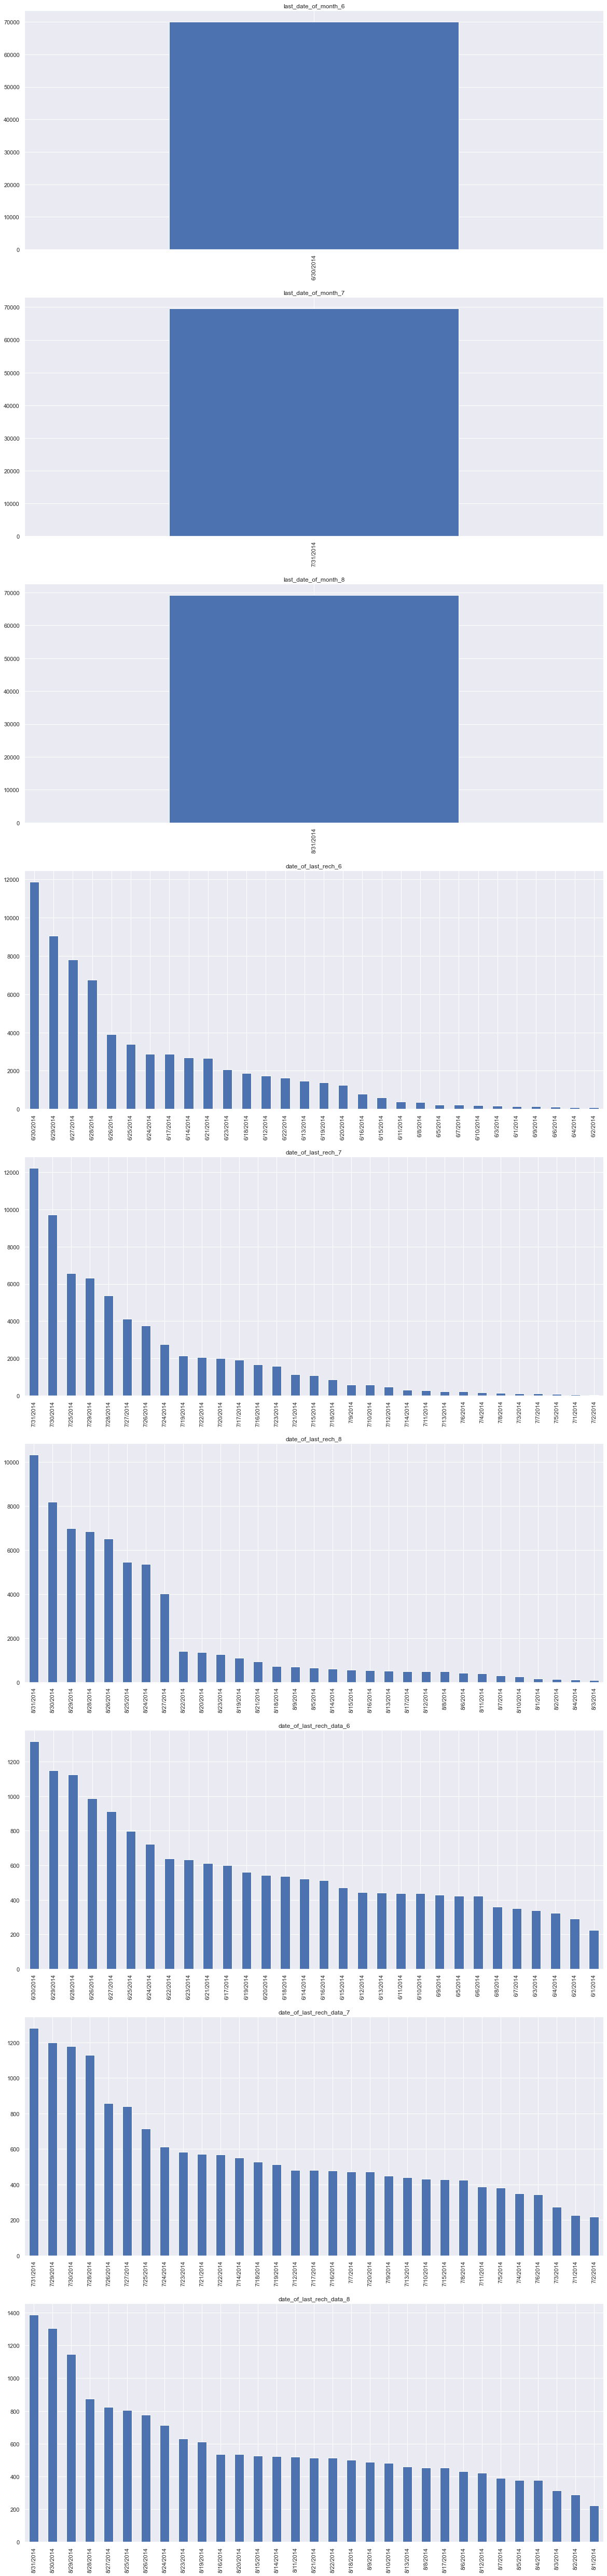

In [182]:
# unique values distribution in categorical columns

plt.figure(figsize=(20, 100))

cols = 1
rows = (len(cat_cols) // cols) + 1

for i in range(len(cat_cols)):
    plt.subplot(rows,cols,i+1)
    dataset[cat_cols[i]].value_counts().plot(kind='bar')
    plt.title(cat_cols[i])
plt.show()

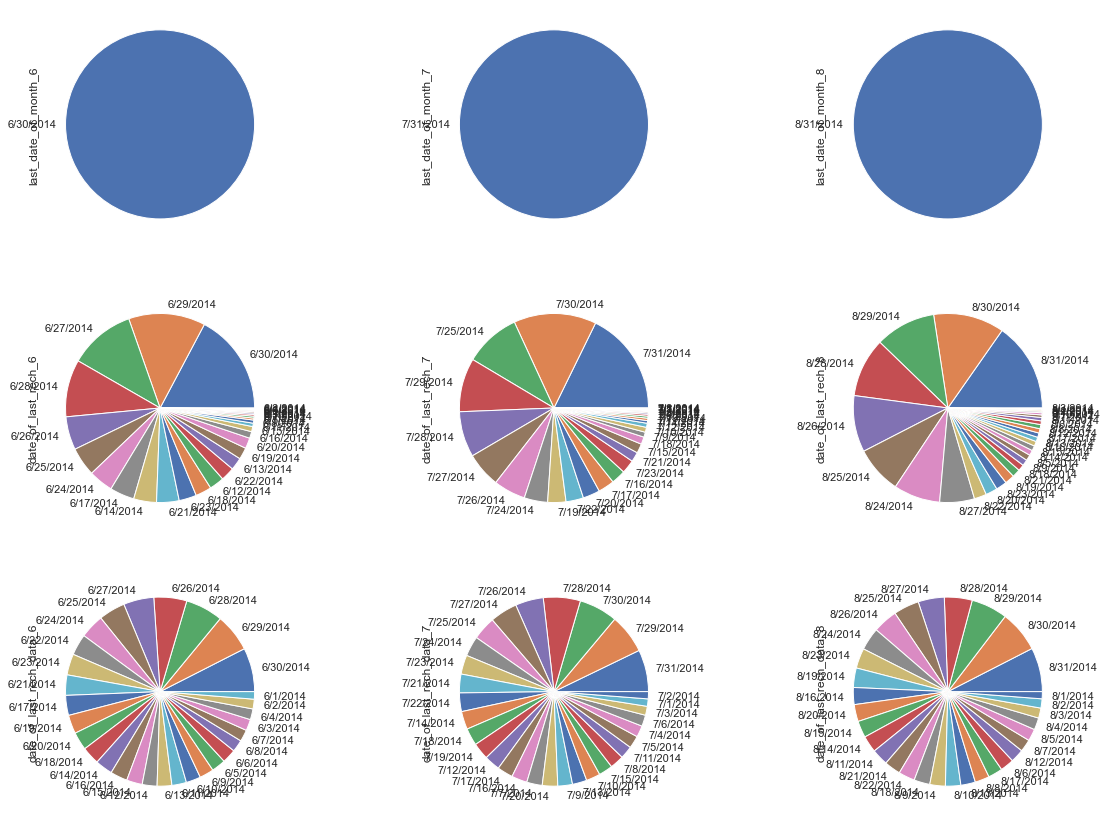

In [181]:
# unique values proportions in categorical columns

plt.figure(figsize=(20, 20))

cols = 3
rows = (len(cat_cols) // cols) + 1

for i in range(len(cat_cols)):
    plt.subplot(rows,cols,i+1)
    dataset[cat_cols[i]].value_counts().plot(kind='pie')
plt.show()

In [172]:
# numerical columns

num_cols = dataset.drop(columns=target).select_dtypes(np.number).columns

print('numerical columns in data:',len(num_cols))

dataset[num_cols].head()

numerical columns in data: 161


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0
2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94

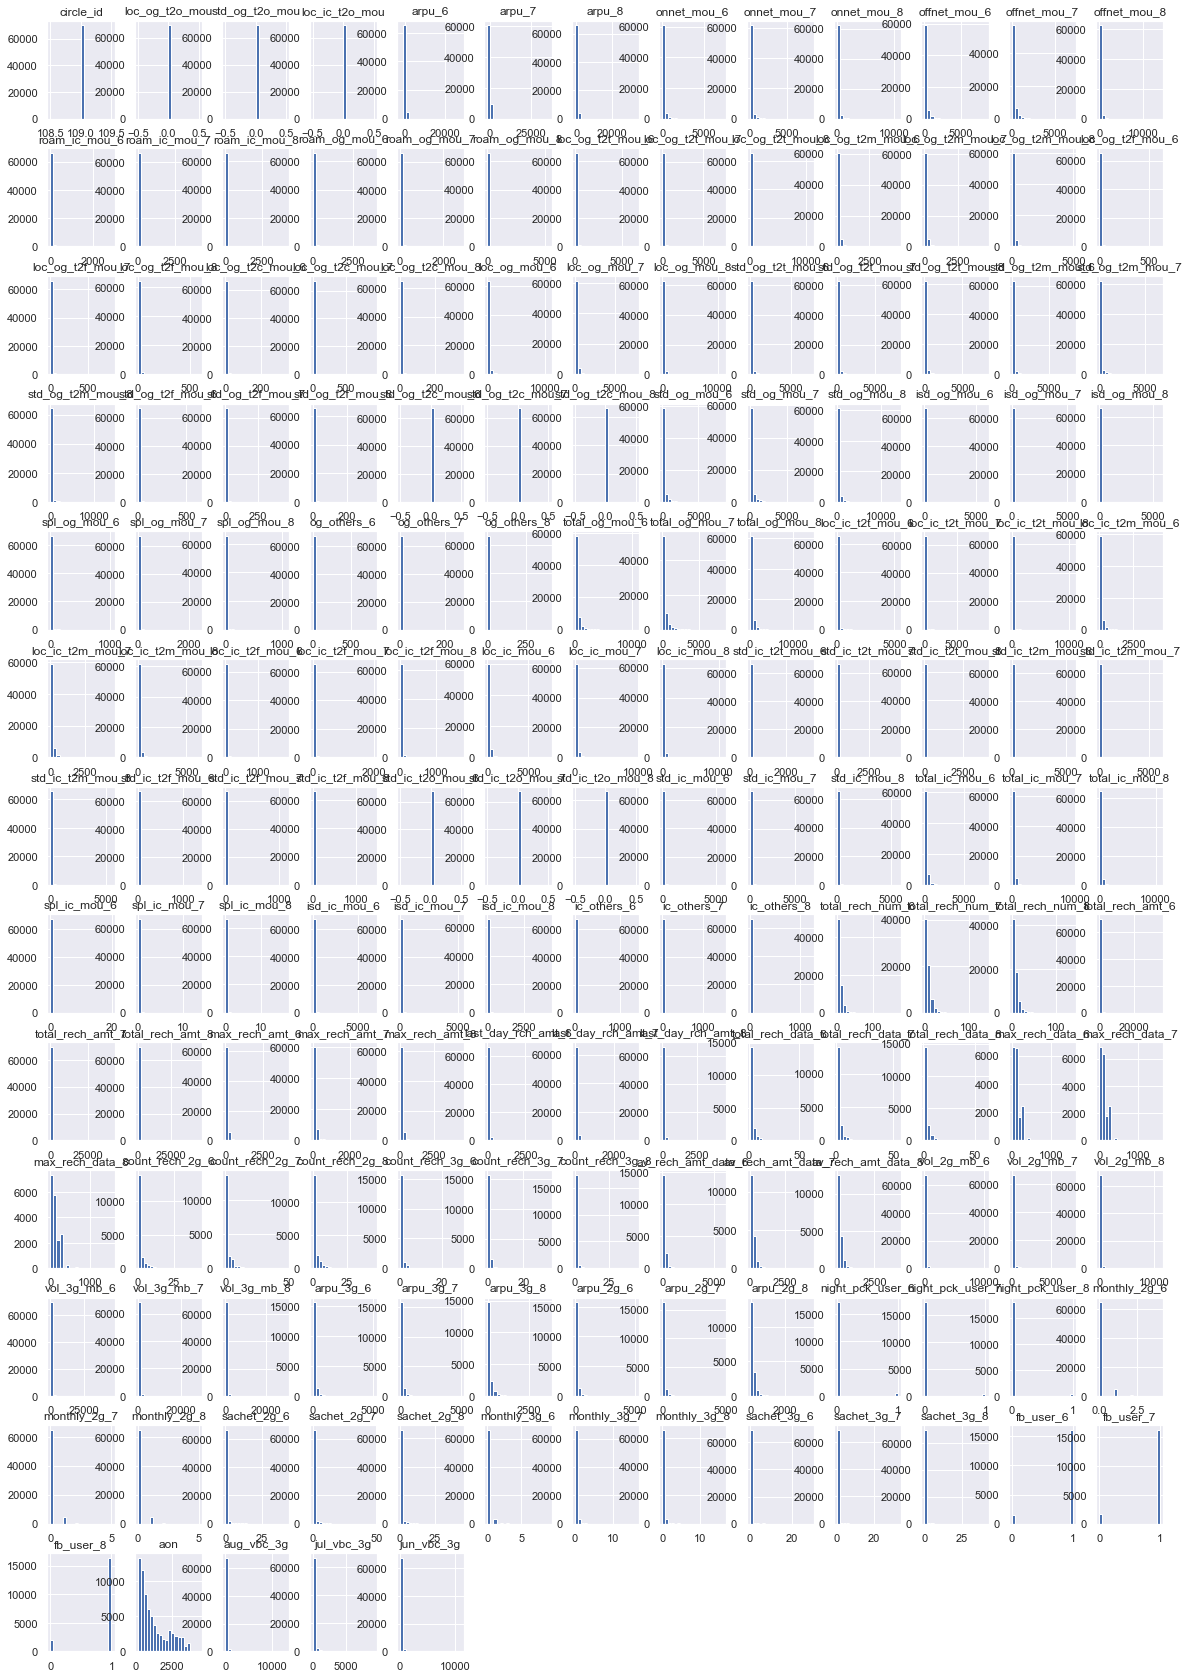

In [187]:
# frequency of values for numerical variables

dataset.loc[:,num_cols].hist(figsize=(20,30),bins=20)
plt.show()

In [ ]:
# value density of columns with numerical values

plt.figure(figsize=(20, 80))

cols = 3
rows = (len(num_cols) // cols) + 1

for i in range(len(num_cols)):
    plt.subplot(rows,cols,i+1)
    try:
        dataset[num_cols[i]].plot(kind='kde')
    except:
        pass
plt.show()

In [ ]:
# values distribution with numerical values

plt.figure(figsize=(20, 60))

cols = 3
rows = (len(num_cols) // cols) + 1

for i in range(len(num_cols)):
    plt.subplot(rows,cols,i+1)
    dataset[num_cols[i]].plot(kind='box')
plt.show()

## multi-variate analysis

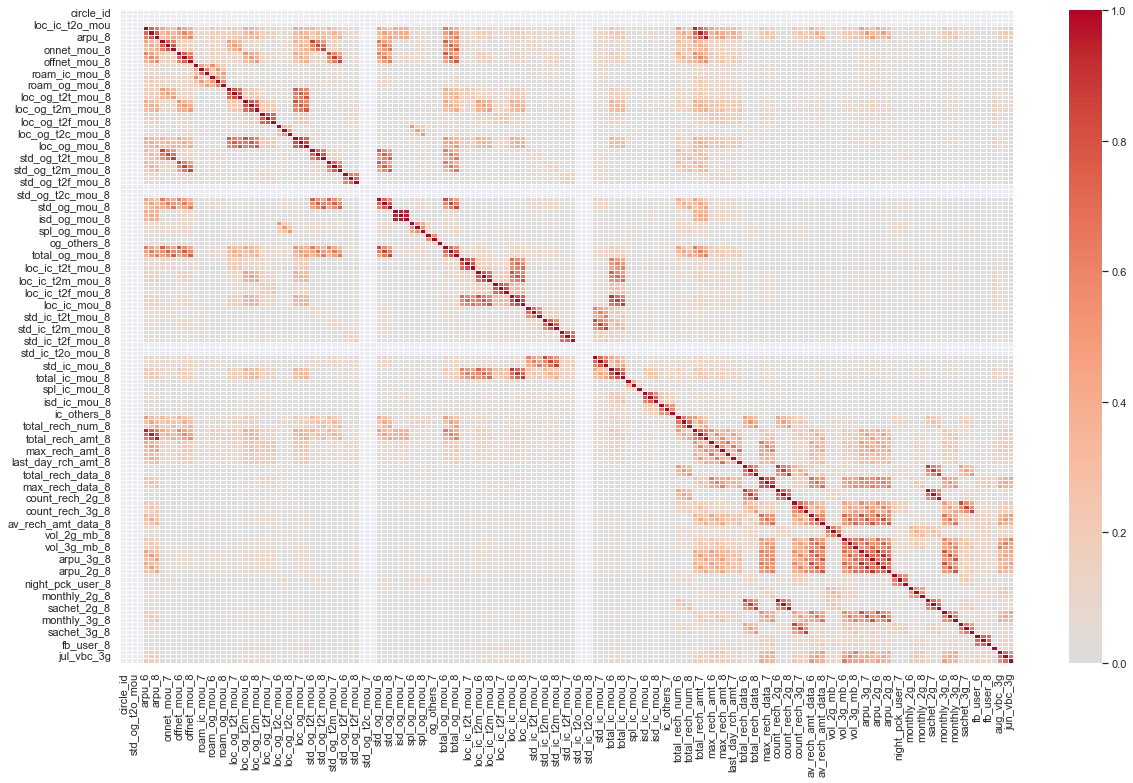

In [189]:
correlation_data=dataset[num_cols].corr()

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(round(correlation_data,2),cmap="coolwarm",vmin=0, vmax=1,linewidths=.5, fmt= '.2f',ax=ax,center = 0)
plt.show()

--------------

# Feature Engineering

In [190]:
# select target column from data

data_churn = dataset['churn_probability']

dataset = dataset.drop(columns='churn_probability')

print(f'''
values in target variable: {data_churn.unique()}
values: {data_churn.size}
''')


values in target variable: [0 1]
values: 69999



In [12]:
# date columns

data_cols = dataset.columns

print('total columns:',len(data_cols))

total columns: 170


In [14]:
# split dataset into training and validation datatset, in 80:20 ratio

train_data,val_data,train_data_churn,val_data_churn = train_test_split(dataset,data_churn,train_size=0.8,random_state=100)

In [15]:
# train data

print('train data size:',train_data.shape)

train data size: (55999, 170)


In [16]:
# validation data

print('validation data size:',val_data.shape)

validation data size: (14000, 170)


### single-value dominance columns treatment 

* columns with high proportion share of most occuring unique value -- drop columns

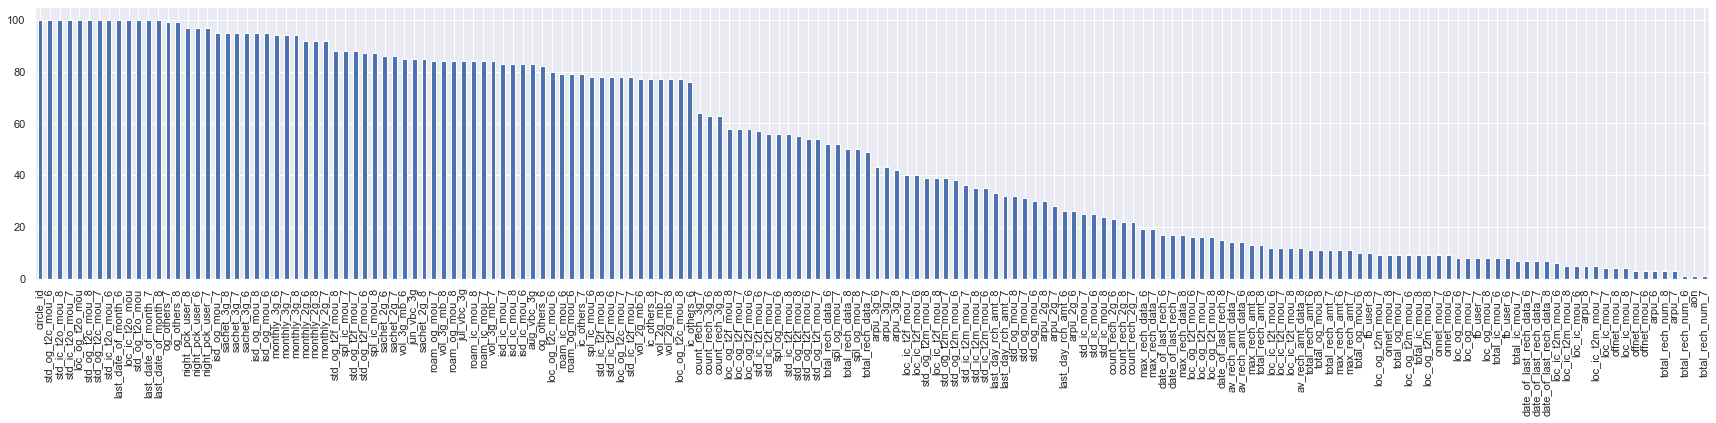

In [17]:
# numerical columns with proportion share of most occuring unique value

value_share_cols = dict()

for column in data_cols:
    try:
        # highest_share_value --> value count of most ocuring value / total rows in dataset
        highest_share_value = int((train_data[column].value_counts(normalize=True)*100)[0])
        value_share_cols[column] = highest_share_value
    except(KeyError):
        highest_share_value = int((train_data[column].value_counts(normalize=True)*100).values[0])
        value_share_cols[column] = highest_share_value
        pass

# plot columns value single value with maximum shares
value_share_cols_data = pd.Series(value_share_cols)
value_share_cols_data.sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

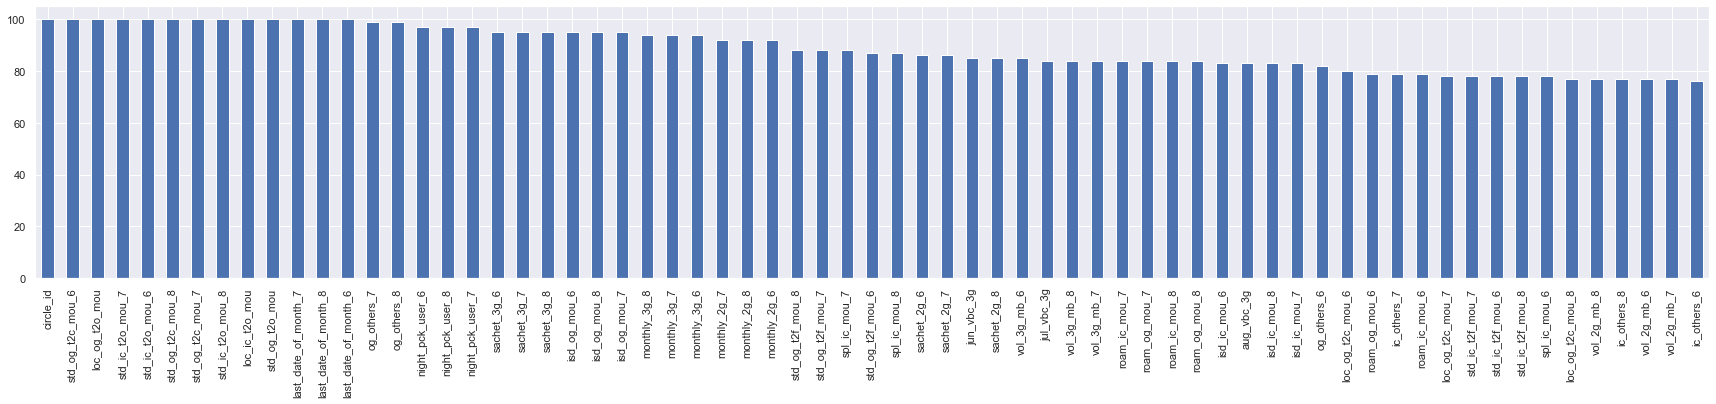

In [18]:
# select columns with share of single value more than threshold proportion

threshold_dominance = 75

dominant_cols = [column for column,value in value_share_cols.items() if value>=threshold_dominance]

# plot columns with more than threshold proportion share of single value 
value_share_cols_data[dominant_cols].sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

In [19]:
# descriiption of columns having share of single value above threshold

train_data[dominant_cols].describe(percentiles=[0.25,0.50,0.75,0.90,0.99]).iloc[5:,:]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,og_others_6,og_others_7,og_others_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
50%,109.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.00,0.00,0.000,0.0000,0.000,0.000,0.0,0.0,0.0,0.0000,0.000,0.0000,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
75%,109.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.00,0.00,0.000,0.0000,0.000,0.000,0.0,0.0,0.0,0.0000,0.000,0.0000,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
90%,109.0,0.0,0.0,0.0,12.1330,5.130,5.2220,22.8800,9.900,9.306,2.43,3.05,3.400,0.6600,0.460,0.460,0.0,0.0,0.0,0.0000,0.000,0.0000,1.28,0.00,0.00,2.7300,2.780,2.7800,0.0,0.0,0.0,0.26,0.06,0.13,4.8100,6.630,6.5560,0.6300,0.780,0.750,104.1800,97.920,93.006,299.996,331.5000,368.6300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,154.3660,130.4680,106.0560
99%,109.0,0.0,0.0,0.0,221.8054,157.729,163.2792,295.1524,224.445,215.326,20.13,23.58,24.228,25.6006,24.475,24.038,0.0,0.0,0.0,8.5553,8.833,7.1092,6.94,0.00,0.00,40.6353,43.134,39.4088,0.0,0.0,0.0,0.66,0.64,0.69,164.8306,177.607,178.3376,15.0565,17.202,16.608,992.2782,999.333,983.730,2168.888,2232.6908,2333.9514,1.0,1.0,1.0,1.0,1.0,1.0,8.0,9.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1216.8758,1241.4292,1179.0062
max,109.0,0.0,0.0,0.0,2850.9800,4155.830,4169.8100,3775.1100,2812.040,5337.040,342.86,916.24,351.830,628.5600,465.790,354.160,0.0,0.0,0.0,5900.6600,5490.280,5681.5400,800.89,270.24,394.93,1351.1100,1136.080,1394.8900,0.0,0.0,0.0,19.76,13.46,16.86,6789.4100,5289.540,4127.0100,1362.9400,1495.940,1209.860,7213.0600,7873.550,11117.610,45735.400,28144.1200,30036.0600,1.0,1.0,1.0,4.0,5.0,5.0,34.0,48.0,44.0,9.0,16.0,16.0,29.0,33.0,41.0,8476.2600,9165.6000,11166.2100


* some columns have only one value, standard deviation = 0 -- drop columns
* some columns have high outliers, max >>>> 99% value -- outlier treatment

In [20]:
print(f'''
total column with more than {threshold_dominance}% share of single value: {len(dominant_cols)}
data loss: {round(train_data[dominant_cols].size*100/train_data.size,2)}%
''')


total column with more than 75% share of single value: 67
data loss: 39.41%



In [21]:
# drop column with more than threshold proportion share of single value

train_data = train_data.drop(columns=dominant_cols,axis=1)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon
59805,20.000,457.270,0.000,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,189.49,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,NaN,7/27/2014,8/26/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,6/27/2014,7/19/2014,8/22/2014,110,0,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,6/27/2014,7/24/2014,8/29/2014,0,48,198,6/25/2014,7/12/2014,8/29/2014,3.0,4.0,2.0,154.0,198.0,198.0,3.0,4.0,2.0,0.0,0.0,0.0,204.0,301.0,352.0,17.53,48.9,86.81,0.0,0.0,0.0,1.0,1.0,1.0,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,6/19/2014,7/20/2014,8/28/2014,30,0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2

### null values treatment

* columns with high proportion null values -- drop column
* columns with low proportion null values -- impute with mode and median.

In [22]:
# null values in columns

# columns with missing values
missing_columns = list(train_data.columns[train_data.isnull().any()])


# missing columns data
missing_data = pd.DataFrame({"Columns" : missing_columns,                             
                            "Type": '',
                            "Unique Value" : '',

                             "Percentage" : ''})
# unique values
missing_data['Unique Value']  = missing_data.apply(lambda x: list(set(train_data[x['Columns']].dropna())),axis = 1)
#Percentage of missing values
missing_data['Percentage']  = missing_data.apply(lambda x: train_data[x['Columns']].isnull().sum()/ len(train_data[x['Columns']])*100,axis = 1)
# total missing values
missing_data['Total Missing'] = missing_data.apply(lambda x: train_data[x['Columns']].isnull().sum(),axis = 1)
# type of values in column
def check_type(list_):    
    if all([isinstance(word, float) for word in list_]):
        return "float"
    if all([isinstance(word, str) for word in list_]):
        return "string"
    if all([isinstance(word, int) for word in list_]):
        return "int"
missing_data["Type"] = missing_data.apply(lambda x: check_type(x['Unique Value']),axis =1 )
# drop 'Unique Value' from data 
missing_data.drop(columns=['Unique Value'],inplace=True)

# missing values report in data

missing_data.sort_values(by='Percentage',ascending=False)

,Columns,Type,Percentage,Total Missing
66,count_rech_3g_6,float,74.854908,41918
72,arpu_3g_6,float,74.854908,41918
54,date_of_last_rech_data_6,string,74.854908,41918
78,fb_user_6,float,74.854908,41918
63,count_rech_2g_6,float,74.854908,41918
69,av_rech_amt_data_6,float,74.854908,41918
57,total_rech_data_6,float,74.854908,41918
75,arpu_2g_6,float,74.854908,41918
60,max_rech_data_6,float,74.854908,41918
64,count_rech_2g_7,float,74.435258,41683


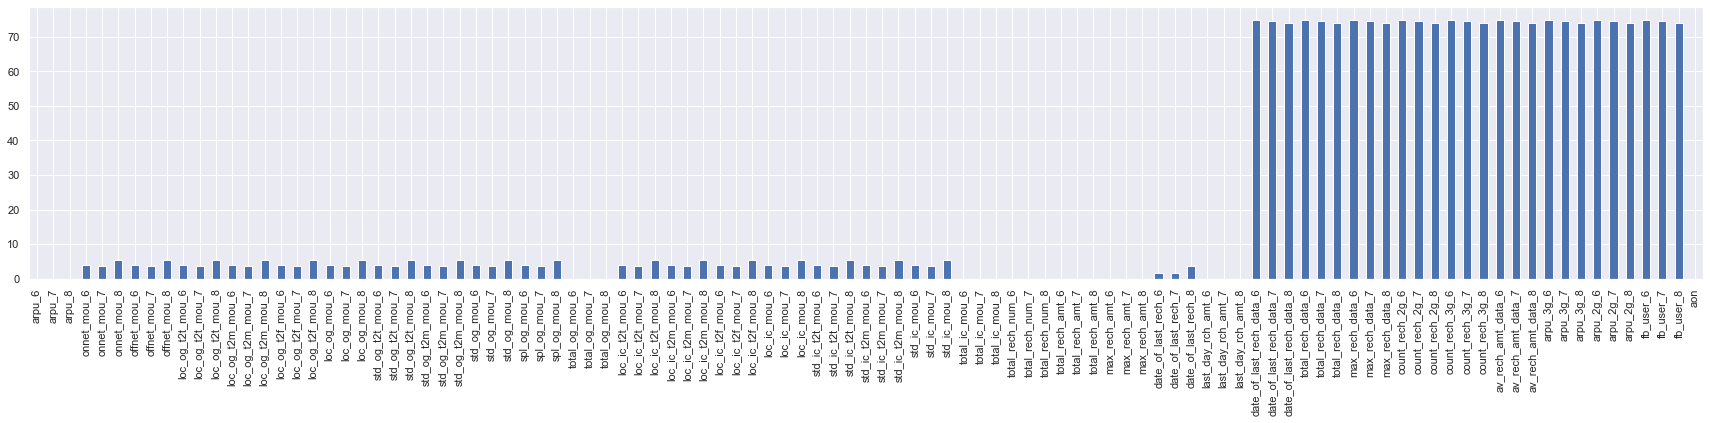

In [23]:
# null values percentage in columns in data

null_values_cols = (train_data.isnull().sum()/train_data.shape[0])*100

# null values columns in data, null values != 0
null_columns = null_values_cols[null_values_cols!=round(0,8)]

null_values_cols.plot(kind='bar',figsize=(30,5))
plt.show()

* some columns have more than 70% null values.
* most of the columns have less than 10% null values.

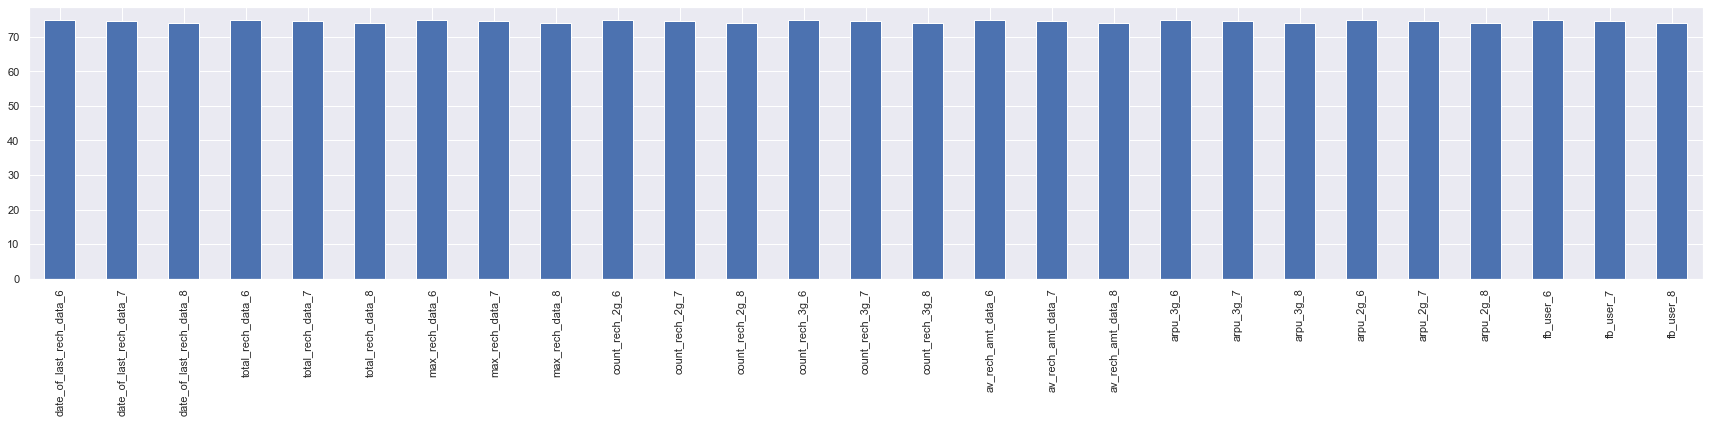

In [24]:
# columns with more than threshold of 50% for null values in data

# set threshold for null values perportion
threshold_null = 50

null_columns_abv_threshold = null_values_cols[null_values_cols>=threshold_null]
null_columns_abv_threshold_cols = null_columns_abv_threshold.index
null_columns_abv_threshold.plot(kind='bar',figsize=(30,5))

plt.show()

In [25]:
# null columns details

print(f'''
total columns with more than {threshold_null}% null values: {len(null_columns_abv_threshold_cols)}

data loss: {round(train_data[null_columns_abv_threshold_cols].size*100/train_data.size,2)}%
''')


total columns with more than 50% null values: 27

data loss: 26.21%



In [26]:
# drop columns with more than threshold null values

train_data = train_data.drop(columns=null_columns_abv_threshold_cols)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,20.000,457.270,0.000,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,189.49,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,NaN,7/27/2014,8/26/2014,0,0,0,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,6/27/2014,7/19/2014,8/22/2014,110,0,130,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,6/27/2014,7/24/2014,8/29/2014,0,48,198,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,6/19/2014,7/20/2014,8/28/2014,30,0,30,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,5.11,0.00,26.51,171.24,211.53,92.29,176.36,211.53,118.81,298.23,512.79,525.01,13,17,9,271,270,172,41,50,41,6/30/2014,7/29/2014,8/29/2014,20,30,10,1072


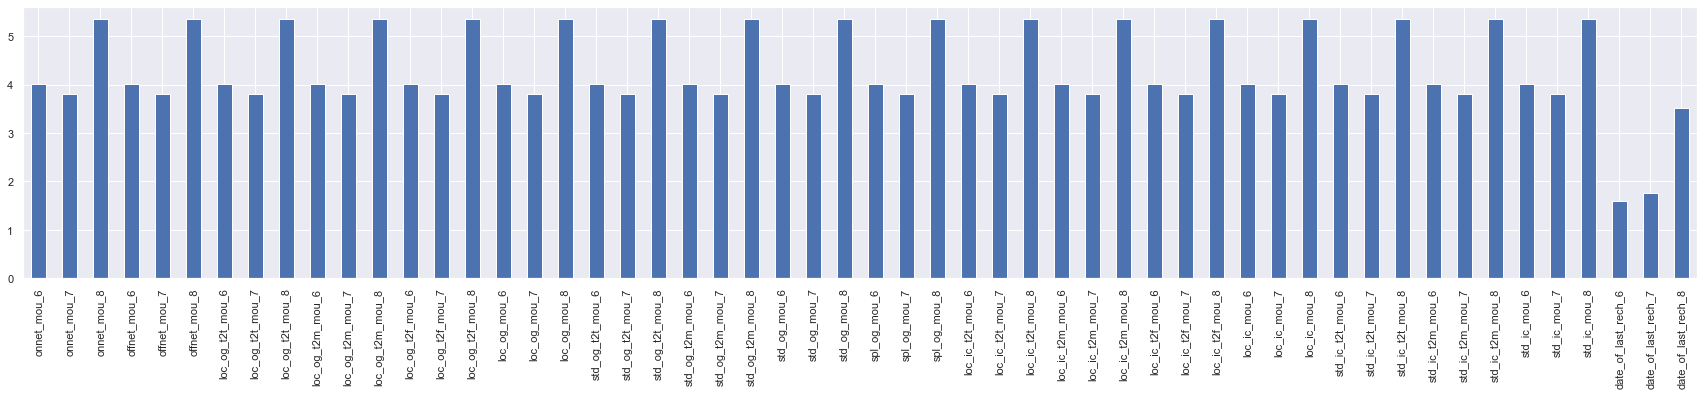

In [27]:
# null values columns in training data

null_values = (train_data.isnull().sum()*100/train_data.shape[0])
null_values = null_values[null_values!=round(0,8)]
null_values_cols = null_values.index

null_values.plot(kind='bar',figsize=(30,5))
plt.show()

* some column have same precentage of null values i.e. approx. 5% and 4%.
* some column have null percentage less than 2%.

In [28]:
# columns with null values

print(f'''
total columns left with null values: {len(null_values_cols)}

total null values in training data: 
quantity: {train_data.isna().sum().sum()}
data loss: {round(train_data.isna().sum().sum()*100/train_data.size,2)}%
''')

train_data[null_values_cols].head(10)


total columns left with null values: 54

total null values in training data: 
quantity: 129190
data loss: 3.04%



,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,7/27/2014,8/26/2014
32717,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,6/27/2014,7/19/2014,8/22/2014
5964,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,6/27/2014,7/24/2014,8/29/2014
47623,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,6/19/2014,7/20/2014,8/28/2014
31881,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,5.11,0.00,26.51,171.24,211.53,92.29,176.36,211.53,118.81,6/30/2014,7/29/2014,8/29/2014
42186,20.21,5.66,13.21,45.58,96.48,70.51,20.21,5.66,13.21,38.93,26.21,52.91,6.21,13.44,15.88,65.36,45.33,82.01,0.00,0.00,0.00,0.43,2.93,1.71,0.43,2.93,1.71,0.00,53.88,0.00,78.68,62.24,38.71,332.91,406.56,464.04,198.58,212.03,311.19,610.18,680.84,813.96,0.00,0.00,0.00,35.28,39.66,34.81,35.63,72.38,38.24,6/27/2014,7/25/2014,8/12/2014
54756,82.74,NaN,NaN,156.08,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,6/15/2014,7/15/2014,NaN
67545,42.61,20.13,100.61,170.48,89.96,162.79,34.48,7.08,28.81,22.54,30.43,44.96,4.63,5.36,1.03,61.66,42.88,74.81,3.58,13.05,71.79,127.48,54.16,116.79,131.06,67.21,188.59,0.00,0.00,0.00,5.34,7.66,24.98,11.98,24.16,23.93,0.35,6.24,11.88,17.68,38.08,60.79,1.13,7.28,36.29,27.39,16.98,13.88,28.53,24.26,50.18,6/30/2014,7/27/2014,8/31/2014
54930,25.39,24.11,51.49,149.11,175.74,175.28,25.39,23.76,51.49,128.36,160.36,167.91,0.00,0.00,0.00,153.76,184.13,219.41,0.00,0.35,0.00,20.74,10.29,7.36,20.74,10.64,7.36,0.00,0.18,0.06,46.71,17.09,41.33,260.69,234.28,190.51,0.00,1.21,1.28,307.41,252.59,233.13,0.28,0.00,0.00,17.21,30.69,32.94,17.49,30.69,32.94,6/30/2014,7/30/2014,8/30/2014
62934,23.43,60.18,74.73,75.96,62.89,62.38,5.69,13.81,14.09,67.06,62.28,52.59,0.00,0.00,0.00,72.76,76.09,66.69,17.73,46.36,60.63,8.89,0.61,9.78,26.63,46.98,70.41,0.00,0.68,0.00,60.29,85.49,46.06,168.24,220.73,169.81,0.00,0.00,0.00,228.54,306.23,215.88,42.30,13.01,0.03,5.

* small amount of null data, so can be easily imputed with majority values -- mode and median.

In [29]:
# null columns with object values
null_cat_cols = train_data.select_dtypes('object').columns
print('null columns with object values:',len(null_cat_cols))

# columns with number(float) values
null_num_cols = train_data.select_dtypes(np.number).columns
print('null columns with number values:',len(null_num_cols))

null columns with object values: 3
null columns with number values: 73


In [30]:
# columns with object values - impute with mode
train_data[null_cat_cols] = train_data[null_cat_cols].fillna(train_data[null_cat_cols].mode().iloc[0])

# columns with number(float) values - impute with median
train_data[null_num_cols] = train_data[null_num_cols].fillna(train_data[null_num_cols].median())

In [31]:
# null values in data 

print(f'''
null values in data: {train_data.isna().sum().sum()}
''')


null values in data: 0



### datatype treatment

* extract date in integer format from MM/DD/YYYY columns

In [32]:
# cat cols

cat_cols = train_data.select_dtypes('object').columns

print('total object type columns:', len(cat_cols))

train_data[cat_cols].head()

total object type columns: 3


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,6/30/2014,7/27/2014,8/26/2014
32717,6/27/2014,7/19/2014,8/22/2014
5964,6/27/2014,7/24/2014,8/29/2014
47623,6/19/2014,7/20/2014,8/28/2014
31881,6/30/2014,7/29/2014,8/29/2014


In [33]:
# extract date frmo MM/DD/YYYY columns

# take DD from MM/DD//YYYY format
for col in cat_cols:
    train_data[col] = train_data[col].apply(lambda x: x.split("/")[1])
    
# convert datatype of all numbers to integer format
train_data[cat_cols] = train_data[cat_cols].astype('int')

train_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,30,27,26
32717,27,19,22
5964,27,24,29
47623,19,20,28
31881,30,29,29


### outlier treatment

* drop columns with high outliers percentage.
* drop rows through columns with very low outliers percentage.

In [34]:
# outlier checking, visulisation, and update dataframe

class Outlier:
    '''takes dataframe and columns as arguments anc check for outliers'''
    def __init__(self,data,column_name,Q1=0.25,Q2=0.75):
                
        self.column_name = column_name
        # copy dataframe
        self.df = data.copy()
        self.q1 = Q1
        self.q2 = Q2
        
        # set quantiles
        Q1=self.df[self.column_name].quantile(self.q1)
        Q3=self.df[self.column_name].quantile(self.q2)
        IQR=Q3-Q1
        
        # outlier values
        self.df_outlier = self.df[((self.df[self.column_name] < (Q1 - 1.5 * IQR)) | (self.df[self.column_name] > (Q3 + 1.5 * IQR)))]
        # percent of outliers values in dataframe
        self.outlier_prct = round(self.df_outlier.size*100/self.df.size,2)
        # update dataframe by removing outliers from column
        self.df_new = self.df[((self.df[self.column_name] >= (Q1 - 1.5 * IQR)) & (self.df[self.column_name] <= (Q3 + 1.5 * IQR)))]
        
    @property
    def check(self):
        
        '''returns outliers percentage in column'''
        return self.outlier_prct
    
    @property
    def visualize(self):
        
        '''plots boxplot of column'''
        self.df_outlier[self.column_name].plot(kind='box',vert=False,figsize=(30,10),rot=0)
        plt.show()
        
    @property
    def new_dataframe(self):
        
        '''return new dataframe without outliers'''
        return self.df_new

In [35]:
# description of data

train_data.describe().loc[['min','25%','50%','75%','max'],:]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
min,-2258.7090,-1289.715,-945.808,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,180.0
25%,93.3950,86.884,83.596,8.11,7.24,7.43,36.92,33.610,34.340,1.91,1.86,1.93,10.78,10.88,11.09,0.00,0.00,0.00,18.58,18.835,19.09,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,44.59,42.780,38.610,3.34,3.53,3.73,18.58,19.735,20.64,0.00,0.00,0.00,32.48,34.53,35.42,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.08,0.19,38.38,41.160,38.030,3.0,3.0,3.0,110.0,100.0,90.0,30.0,30.0,30.0,21.0,23.0,24.0,0.0,0.0,0.0,467.5
50%,197.0500,191.481,191.736,34.18,32.23,32.11,96.00,91.330,91.390,11.83,11.51,11.73,40.79,39.79,40.19,0.00,0.00,0.00,64.74,62.980,63.28,0.00,0.00,0.00,3.990,3.690,3.26,11.640,11.210,10.54,0.00,0.00,0.00,144.79,141.240,138.080,15.74,15.78,16.06,56.20,56.730,58.09,0.88,0.91,0.93,91.99,92.24,94.04,0.00,0.00,0.00,2.05,2.08,2.03,5.91,5.99,5.81,114.54,115.980,114.710,6.0,6.0,5.0,228.0,220.0,223.0,110.0,110.0,98.0,27.0,27.0,27.0,30.0,30.0,30.0,867.0
75%,370.1775,365.494,369.554,113.18,108.35,106.06,222.64,218.295,216.325,38.65,37.64,37.17,104.99,103.07,102.76,1.83,1.86,1.73,161.32,157.585,156.85,26.78,27.34,24.81,48.835,49.745,45.94,133.795,137.975,130.98,2.15,3.33,3.51,373.53,378.345,369.875,44.89,43.81,43.63,126.92,126.590,127.17,7.56,7.58,7.24,201.29,197.80,197.65,3.61,3.74,3.38,13.86,14.96,13.96,25.13,26.53,25.41,251.06,249.435,249.335,9.0,10.0,9.0,437.5,430.0,435.0,120.0,128.0,144.0,29.0,30.0,30.0,110.0,110.0,130.0,1808.0
max,27731.0880,35145.834,33543.624,7376.71,8011.91,10752.56,5905.14,6740.080,14007.340,6431.33,7400.66,10752.56,4696.83,4557.14,4961.33,570.43,602.69,588.29,10643.38,7674.780,11039.91,7366.58,7983.16,8014.43,5622.580,6622.540,13950.04,7498.030,8086.440,13980.06,1023.21,2372.51,954.51,10674.03,8224.160,14043.060,5315.59,9324.66,10696.23,4450.74,4455.830,6274.19,1872.34,1983.01,1676.58,5525.34,9669.91,10830.16,3336.38,4708.71,3930.24,3044.44,3470.38,3008.96,3929.24,6745.76,3930.24,7074.59,9699.010,10830.380,170.0,138.0,127.0,35190.0,40335.0,45320.0,4010.0,3299.0,3399.0,30.0,31.0,31.0,4010.0,3100.0,3399.0,4319.0


* some columns have almost all values as 0.

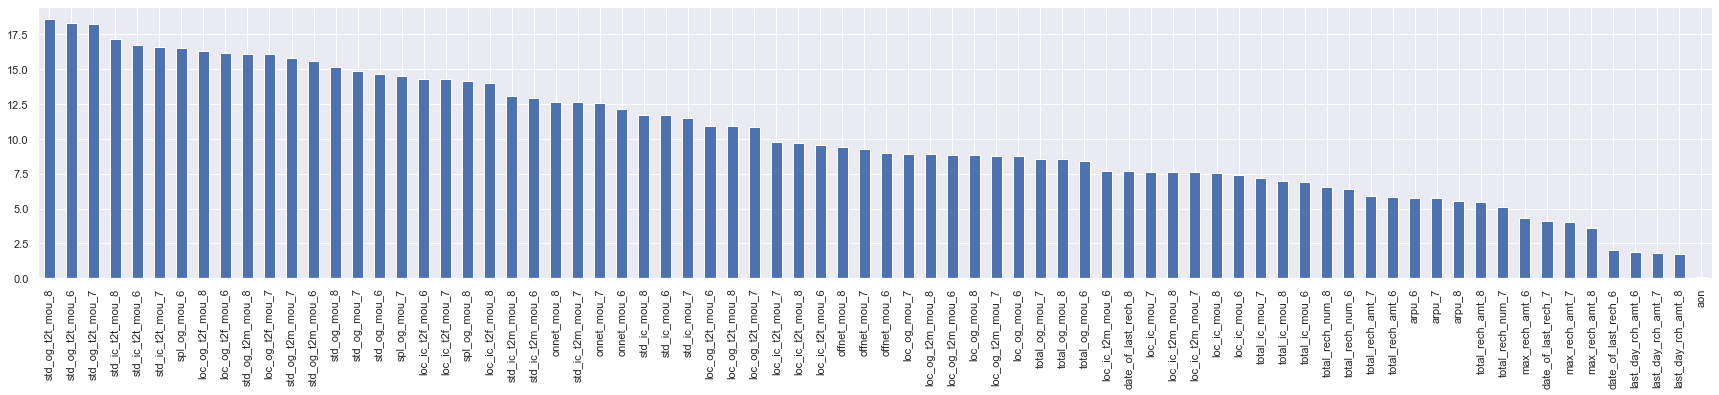

In [36]:
# find percentage of outlier in columns

outlier_cols = dict()

for column in train_data.columns:
    instance = Outlier(train_data,column)
    outlier_prct = instance.check
    if outlier_prct>0:
        outlier_cols[column] = outlier_prct
    
plt.figure(figsize=(25,25))

outlier_data = pd.Series(outlier_cols)
outlier_data.sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

* columns have outliers from 0.8% to 22.%.
* drop columns with outliers percentage above threshhold.
* drop rows with outliers percentage above threshhold so that minimal values are dropped.

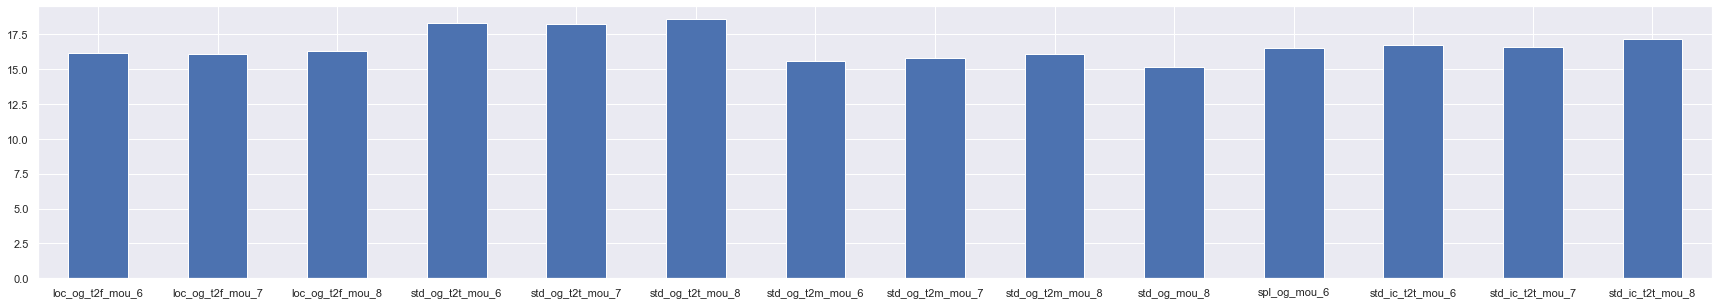

In [37]:
# columns with outlier percentage above threhold

threshold_max_outlier = 15

outliers_above_threshold = outlier_data[outlier_data>=threshold_max_outlier]
outliers_above_threshold_cols = outliers_above_threshold.keys()
outlier_data[outliers_above_threshold_cols].plot(kind='bar',figsize=(30,5))
plt.xticks(rotation='horizontal')
plt.show()

In [38]:
# statical description of columns with outlier percentage above threhold

train_data[outliers_above_threshold_cols].describe(percentiles=[0.75,0.90,0.99])

,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,3.585540,3.635619,3.480495,76.396305,79.872393,78.581538,84.541891,88.283852,86.060976,166.064118,3.775602,8.896875,9.425469,9.294144
std,12.944654,13.085021,12.821542,248.002132,260.701119,260.916070,246.897037,262.317779,265.420893,402.666184,15.235648,48.719268,53.958970,50.888335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.990000,3.690000,3.260000,10.540000,0.000000,0.000000,0.000000,0.000000
75%,1.830000,1.860000,1.730000,26.780000,27.340000,24.810000,48.835000,49.745000,45.940000,130.980000,2.150000,3.610000,3.740000,3.380000
90%,8.990000,9.160000,8.710000,200.716000,210.494000,207.376000,228.388000,236.964000,232.896000,525.514000,10.160000,18.980000,19.714000,18.930000
99%,54.110600,54.862000,53.761400,1187.220600,1255.508400,1244.662600,1230.385200,1253.867000,1198.349800,1893.982200,50.112400,132.891000,145.412400,145.763400
max,570.430000,602.690000,588.290000,7366.580000,7983.160000,8014.430000,5622.580000,6622.540000,13950.040000,13980.060000,1023.210000,3336.380000,4708.710000,3930.240000


In [39]:
# outliers details

print(f'''
total columns with more than {threshold_max_outlier}% outliers: {len(outliers_above_threshold_cols)}

data loss: {round(train_data[outliers_above_threshold_cols].size*100/train_data.size,2)}%

''')


total columns with more than 15% outliers: 14

data loss: 18.42%




In [40]:
# drop columns with outliers above threshold 

train_data = train_data.drop(columns=outliers_above_threshold_cols)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,20.000,457.270,0.000,34.18,57.21,0.00,96.00,132.28,0.00,11.83,57.21,0.00,40.79,132.28,0.00,64.74,189.49,0.00,11.64,0.00,0.00,0.00,0.00,189.49,0.00,15.74,0.66,0.00,56.20,60.93,0.00,0.88,0.00,0.00,91.99,61.59,0.00,2.05,0.00,0.00,5.91,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,30,27,26,0,0,0,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,500.83,265.19,321.33,43.14,55.19,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,27,19,22,110,0,130,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,44.21,102.86,29.88,109.93,150.68,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,27,24,29,0,48,198,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,168.46,53.21,286.94,0.00,0.00,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,19,20,28,30,0,30,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,26.08,69.79,60.88,124.53,97.84,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,171.24,211.53,92.29,176.36,211.53,118.81,298.23,512.79,525.01,13,17,9,271,270,172,41,50,41,30,29,29,20,30,10,1072


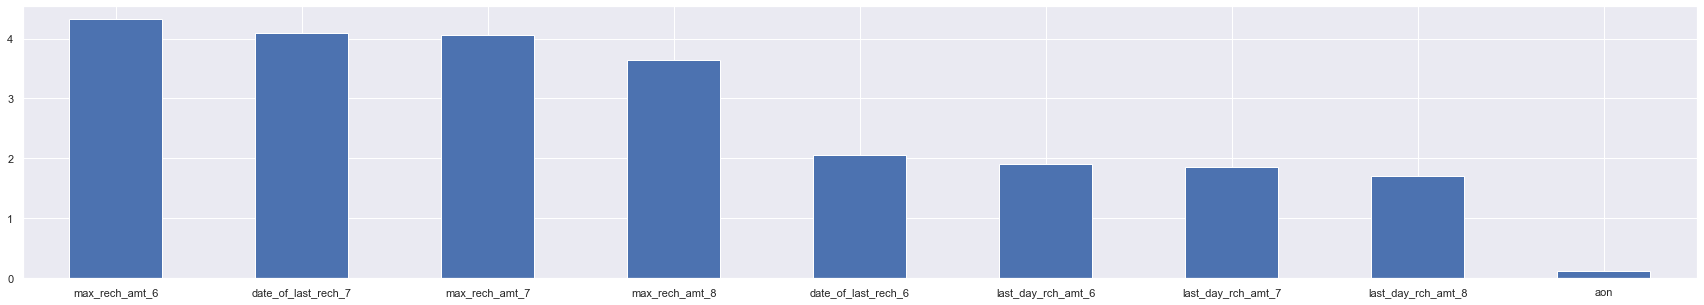

In [41]:
# columns with outlier percentage below threhold of 5%

threshold_min_outlier = 5

outliers_less_threshold = outlier_data.sort_values(ascending=False)[outlier_data<=threshold_min_outlier]
outliers_less_threshold_cols = list(outliers_less_threshold.keys())
outliers_less_threshold.plot(kind='bar',figsize=(30,5))
plt.xticks(rotation='horizontal')
plt.show()

* very less loss in rmoving outliers rows. 

### collinearity treament

* remove columns with very high colinearity with other columns.

In [42]:
# detect if any two feature parameters are highly correlated, more than threshold

threshold_correlation = 0.90

corr = train_data.corr()

corr1 = corr[abs(corr)>=threshold_correlation]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations

corr_result = corr2.stack()

high_corr = corr_result[(abs(corr_result) >= threshold_correlation)]

high_corr

arpu_6        total_rech_amt_6    0.952476
arpu_7        total_rech_amt_7    0.957038
arpu_8        total_rech_amt_8    0.959888
loc_ic_mou_6  total_ic_mou_6      0.901316
dtype: float64

In [43]:
# columns with high correlation

high_corr_cols = list(set([col for corr_col in high_corr.index for col in corr_col]))

train_data[high_corr_cols].head()

,arpu_7,total_ic_mou_6,loc_ic_mou_6,total_rech_amt_7,arpu_6,total_rech_amt_8,arpu_8,total_rech_amt_6
59805,457.270,0.00,91.99,0,20.000,0,0.000,0
32717,177.925,1086.23,1075.08,160,157.847,130,76.996,200
5964,468.304,204.53,102.68,530,309.004,626,412.625,289
47623,60.291,261.66,261.66,70,154.108,310,265.921,180
31881,222.476,298.23,86.31,270,228.004,172,180.528,271


In [44]:
# high correlation columns effect

print(f'''
columns with more than {threshold_correlation}% threshold correlation: {len(high_corr_cols)}      

data loss: {round(train_data[high_corr_cols].size*100/train_data.size,2)}%
''')


columns with more than 0.9% threshold correlation: 8      

data loss: 12.9%



In [45]:
# drop columns with high correlation

train_data = train_data.drop(columns=high_corr_cols)

train_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,34.18,57.21,0.00,96.00,132.28,0.00,11.83,57.21,0.00,40.79,132.28,0.00,64.74,189.49,0.00,11.64,0.00,0.00,0.00,0.00,189.49,0.00,15.74,0.66,0.00,56.20,60.93,0.00,0.88,0.00,0.00,61.59,0.00,2.05,0.00,0.00,5.91,0.00,0.00,61.59,0.06,0,1,2,0,0,0,30,27,26,0,0,0,778
32717,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,500.83,265.19,321.33,43.14,55.19,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,494.78,385.68,4.53,45.01,3.64,5.66,45.01,3.64,539.79,389.33,4,5,4,110,110,130,27,19,22,110,0,130,1322
5964,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,44.21,102.86,29.88,109.93,150.68,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,134.78,109.33,33.46,74.78,58.86,33.46,76.14,58.86,362.09,237.74,6,9,6,154,198,198,27,24,29,0,48,198,1543
47623,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,168.46,53.21,286.94,0.00,0.00,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,60.38,538.38,0.00,0.00,0.00,0.00,0.90,0.00,61.28,538.38,6,2,8,90,70,50,19,20,28,30,0,30,857
31881,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,26.08,69.79,60.88,124.53,97.84,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,239.14,141.03,171.24,211.53,92.29,176.36,211.53,118.81,512.79,525.01,13,17,9,41,50,41,30,29,29,20,30,10,1072


### class imbalance treatment

* equal share of all class labels.

In [46]:
# samples of custmer types in dataset

round(data_churn.value_counts(normalize=True)*100,2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

* almost 90% of customers are in non-churn category.

In [47]:
# SMOTE class balancing

smt = imblearn.over_sampling.SMOTE()
X_train, y_train = smt.fit_resample(train_data, train_data_churn)

y_train.value_counts()*100/len(y_train)

1    50.0
0    50.0
Name: churn_probability, dtype: float64

* classes are now equally balanced.

#### VALIDATION DATA -- Feature Engineering

In [48]:
# dataset

val_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
3425,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.702,563.600,-5.150,26.23,520.31,0.00,0.06,824.91,1.56,0.81,0.15,0.00,26.29,24.91,0.00,0.00,24.24,0.00,0.00,45.91,0.00,0.00,0.00,0.0,0.00,9.39,0.00,0.00,70.16,0.00,0.00,487.73,0.00,0.00,717.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1205.04,0.00,0.0,0.0,0.0,0.00,72.73,1.56,0.0,0.0,0.0,0.00,1347.94,1.56,0.00,19.21,0.00,0.00,37.51,1.40,0.0,0.00,0.00,0.00,56.73,1.40,0.00,8.63,0.00,0.00,4.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.56,0.00,0.00,84.99,3.73,0.0,0.0,0.0,0.0,14.69,2.33,0.00,0.0,0.0,5,19,2,40,642,0,20,54,0,6/27/2014,7/31/2014,8/26/2014,0,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,846,0.00,0.00,0.0
33067,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,772.527,569.952,248.855,437.29,280.06,25.63,1178.14,402.46,97.38,71.13,83.26,69.81,102.63,183.01,123.01,162.23,87.53,0.00,559.16,61.43,0.00,0.43,1.85,0.0,0.00,7.23,4.99,721.83,150.81,0.00,236.43,108.58,0.00,554.54,240.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,790.98,348.69,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1512.81,499.51,0.00,170.39,70.96,0.00,349.56,37.76,0.00,0.0,0.00,0.00,519.96,108.73,0.00,7.21,3.23,0.00,34.13,30.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.34,33.46,0.00,562.06,143.19,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.75,1.0,0.0,11,9,7,943,772,200,128,128,50,6/27/2014,7/27/2014,8/29/2014,128,110,0,6/26/2014,NaN,8/25/2014,1.0,NaN

**Null values Imputation**

In [49]:
# null values

val_data.isna().sum().sum()

365471

In [50]:
# null columns with object values
null_cat_cols = val_data.select_dtypes('object').columns
print('null columns with categorical values:',len(null_cat_cols))

# columns with number(float) values
null_num_cols = val_data.select_dtypes(np.number).columns
print('null columns with number values:',len(null_num_cols))

null columns with categorical values: 9
null columns with number values: 161


In [51]:
# columns with object values - impute with mode
val_data[null_cat_cols] = val_data[null_cat_cols].fillna(val_data[null_cat_cols].mode().iloc[0])

# columns with number(float) values - impute with median
val_data[null_num_cols] = val_data[null_num_cols].fillna(val_data[null_num_cols].median())

**DataType Conversion**

In [52]:
# columns selection

# extract columns
val_data = val_data[X_train.columns]
val_data.head()

# categorical columns
cat_cols = val_data.select_dtypes('object').columns
val_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
3425,6/27/2014,7/31/2014,8/26/2014
33067,6/27/2014,7/27/2014,8/29/2014
52420,6/25/2014,7/8/2014,8/26/2014
5220,6/8/2014,7/25/2014,8/18/2014
33958,6/14/2014,7/29/2014,8/24/2014


In [53]:
# extract date frmo MM/DD/YYYY columns

# take DD from MM/DD//YYYY format
for col in cat_cols:
    val_data[col] = val_data[col].apply(lambda x: x.split("/")[1] if isinstance(x, str) else x)

val_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
3425,27,31,26
33067,27,27,29
52420,25,8,26
5220,8,25,18
33958,14,29,24


In [54]:
# convert datatype of all numbers to integer format

val_data[cat_cols] = val_data[cat_cols].astype('int')

val_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
3425,26.23,520.31,0.00,0.06,824.91,1.56,0.00,24.24,0.00,0.00,45.91,0.00,0.00,70.16,0.00,0.00,1205.04,72.73,1.56,0.00,1347.94,1.56,0.00,19.21,0.00,0.00,37.51,1.40,0.0,0.00,0.00,56.73,1.40,0.00,4.93,0.0,0.00,13.56,0.00,84.99,3.73,5,19,2,20,54,0,27,31,26,0,10,0,846
33067,437.29,280.06,25.63,1178.14,402.46,97.38,162.23,87.53,0.00,559.16,61.43,0.00,721.83,150.81,0.00,790.98,348.69,0.00,0.00,1512.81,499.51,0.00,170.39,70.96,0.00,349.56,37.76,0.00,0.0,0.00,0.00,108.73,0.00,34.13,30.23,0.0,41.34,33.46,0.00,143.19,0.00,11,9,7,128,128,50,27,27,29,128,110,0,840
52420,106.19,27.24,0.00,69.56,1.09,0.88,0.00,0.00,0.00,0.98,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00,0.00,5.51,0.00,0.00,12.33,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,7,1,2,110,50,0,25,8,26,50,50,0,780
5220,1.36,0.00,0.00,3.53,0.36,0.00,1.36,0.00,0.00,1.93,0.00,0.00,3.29,0.00,0.00,0.00,0.00,12.29,0.00,4.89,12.29,0.00,20.94,0.00,0.38,4.14,5.41,9.84,0.0,0.00,2.95,5.41,13.18,1.45,0.00,0.0,1.45,0.00,0.00,5.41,13.18,2,6,1,30,23,98,8,25,18,0,0,98,3241
33958,7.98,30.09,19.36,119.89,174.11,32.33,1.11,1.58,2.74,17.96,28.28,2.61,19.08,29.86,5.36,108.79,152.38,21.96,0.00,127.88,204.21,45.14,1.43,5.04,11.28,19.21,25.49,2.16,0.0,2.06,0.00,32.61,13.44,0.00,3.23,0.0,7.38,16.38,11.49,48.99,24.94,2,8,3,0,128,0,14,29,24,0,0,0,1987


In [55]:
# target and variables in validation dataset

X_val = val_data
y_val = val_data_churn

------------

# Data Modelling

In [56]:
# scaling -- minmax scaling

data_cols = X_train.columns

scaler = MinMaxScaler()

# training
X_train[data_cols] = scaler.fit_transform(X_train[data_cols])

# validation
X_val[data_cols] = scaler.transform(X_val[data_cols])

### extract important features

In [57]:
# creating logistics regresion model for RFE

logistics_model_rfe = LogisticRegression(random_state=100)

logistics_model_rfe.fit(X_train,y_train)

# predict on train dataset
y_train_predict = logistics_model_rfe.predict(X_train)

**Recursive feature elimination to extract important features**

In [58]:
# columns in data

print('columns in data:',len(data_cols))

columns in data: 54


In [59]:
# select most significant features using RFE

requierd_features = 25

rfe=RFE(logistics_model_rfe,n_features_to_select=requierd_features).fit(X_train,y_train)

# important features from linear regression model using RFE
useful_features = list(X_train.columns[rfe.support_])

# non-important features
non_useful_features = X_train.columns[~rfe.support_]

In [60]:
# rank of useful features with logistics regression model

sorted(list(zip(useful_features,rfe.ranking_)), key=lambda x: x[1])

[('onnet_mou_6', 1),
 ('onnet_mou_7', 1),
 ('onnet_mou_8', 1),
 ('offnet_mou_6', 1),
 ('offnet_mou_7', 1),
 ('offnet_mou_8', 1),
 ('loc_og_mou_8', 1),
 ('total_og_mou_6', 1),
 ('loc_ic_t2t_mou_7', 1),
 ('loc_ic_t2m_mou_8', 1),
 ('loc_ic_t2f_mou_8', 1),
 ('loc_ic_mou_7', 1),
 ('std_ic_mou_7', 1),
 ('total_ic_mou_8', 1),
 ('max_rech_amt_8', 1),
 ('last_day_rch_amt_8', 1),
 ('spl_og_mou_8', 7),
 ('loc_og_t2t_mou_8', 8),
 ('loc_og_t2m_mou_8', 10),
 ('total_rech_num_8', 12),
 ('loc_ic_t2f_mou_7', 13),
 ('std_og_mou_7', 21),
 ('total_og_mou_8', 24),
 ('total_og_mou_7', 26),
 ('loc_ic_t2t_mou_8', 29)]

In [61]:
# stat model function

def stat_model_func(columns):

    global X_train,y_train
    X_train_rfe_temp=X_train[columns] # create dataframe from rfe useful feature
    X_train_rfe_sm_temp=sm.add_constant(X_train_rfe_temp) # add intercept
    stat_model_temp=sm.GLM(y_train,X_train_rfe_sm_temp,family=sm.families.Binomial()).fit() # create model using GL model
    return stat_model_temp

In [62]:
# variation inflation factor

def vif_func(columns):
    
    global X_train
    vif_temp=pd.DataFrame() # create empty dataframe
    X_train_rfe_temp=X_train[columns] # create rfe useful feature in dataframe
    X_train_rfe_sm_temp=sm.add_constant(X_train_rfe_temp) # add intercept
    vif_temp['Features']=X_train_rfe_sm_temp.columns # add useful feature names
    vif_temp['VIF']=[round(variance_inflation_factor(X_train_rfe_sm_temp.values,i),2) for i in range(X_train_rfe_sm_temp.shape[1])] # add vif score of the featue with other featueres
    vif_temp = vif_temp.sort_values(by='VIF',ascending=False) # sort by vif score
    return vif_temp

**Statistics Model**

In [63]:
# create stat model

stat_model_01 = stat_model_func(useful_features)
stat_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100492
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41645.
Date:                Wed, 18 Jan 2023   Deviance:                       83290.
Time:                        03:42:26   Pearson chi2:                 4.88e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4275
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6928      0.018     39.503      0.000       0.658       0.727
onnet_mou_6           15.8307      1.289     12.280      0.000      13.304      18.357
onnet_mou_7           17.6225      1.861      9.471      0.000      13.975      21.270
onnet_mou_8          148.1751      2.829     52.386      0.000     142.631     153.719
offnet_mou_6          11.6098      1.018     11.400      0.000       9.614      13.606
offnet_mou_7          15.1429      1.533      9.881      0.000      12.139      18.147
offnet_mou_8         194.8035      3.606     54.025      0.000     187.736     201.871
loc_og_t2t_mou_8    -271.6154     13.849    -19.612      0.000    -298.759    -244.471
loc_og_t2m_mou_8    -122.2543      6.445    -18.968      0.000    -134.886    -109.622
loc_og_mou_8         242.5086     13.768     17.614      0.000     215.524     269.493
std_og_mou_7           5.8373      0.959      6.084      0.000       3.957       7.718
spl_og_mou_8          -1.9392      0.915     -2.119      0.034      -3.733      -0.146
total_og_mou_6       -17.2779      1.776     -9.729      0.000     -20.759     -13.797
total_og_mou_7       -17.2359      1.920     -8.975      0.000     -21.000     -13.472
total_og_mou_8      -201.6709      3.591    -56.163      0.000    -208.709    -194.633
loc_ic_t2t_mou_7       4.7576      2.322      2.049      0.040       0.206       9.309
loc_ic_t2t_mou_8     -21.9859      4.669     -4.709      0.000     -31.137     -12.835
loc_ic_t2m_mou_8     -16.8603      2.111     -7.987      0.000     -20.998     -12.723
loc_ic_t2f_mou_7       1.8799      1.474      1.276      0.202      -1.009       4.769
loc_ic_t2f_mou_8     -48.4980      2.501    -19.390      0.000     -53.400     -43.596
loc_ic_mou_7          22.3456      1.426     15.671      0.000      19.551      25.140
std_ic_mou_7           9.8118      1.120      8.761      0.000       7.617      12.007
total_ic_mou_8       -45.8427      2.394    -19.147      0.000     -50.535     -41.150
total_rech_num_8     -12.9142      0.312    -41.418      0.000     -13.525     -12.303
max_rech_amt_8        -5.4850      0.406    -13.508      0.000      -6.281      -4.689
last_day_rch_amt_8   -22.0219      0.613    -35.946      0.000     -23.223     -20.821
======================================================================================
"""

* some columns have very high p-values.

In [64]:
# p-values of features

stat_model_01.pvalues.sort_values(ascending=False)[:5] # top 5 p-values columns

loc_ic_t2f_mou_7    2.021300e-01
loc_ic_t2t_mou_7    4.048012e-02
spl_og_mou_8        3.407153e-02
loc_ic_t2t_mou_8    2.490980e-06
std_og_mou_7        1.173393e-09
dtype: float64

In [65]:
# remove column from useful features -- highest p-value

high_p_value_col = stat_model_01.pvalues.sort_values(ascending=False).index[0]

useful_features.remove(high_p_value_col)

print(high_p_value_col,': column removed')

loc_ic_t2f_mou_7 : column removed


In [66]:
# check vif

vif_01 = vif_func(useful_features)
vif_01[:10]

,Features,VIF
9,loc_og_mou_8,390.14
8,loc_og_t2m_mou_8,159.32
7,loc_og_t2t_mou_8,147.71
13,total_og_mou_7,95.05
14,total_og_mou_8,48.03
12,total_og_mou_6,47.42
5,offnet_mou_7,39.20
2,onnet_mou_7,37.79
4,offnet_mou_6,22.80
1,onnet_mou_6,21.57


In [67]:
# remove column from useful features -- high VIF value

high_vif_value_col = vif_01['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

loc_og_mou_8 : column removed


In [68]:
# create stat model

stat_model_02 = stat_model_func(useful_features)
stat_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100494
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41794.
Date:                Wed, 18 Jan 2023   Deviance:                       83588.
Time:                        03:42:32   Pearson chi2:                 8.30e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4258
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7134      0.018     40.571      0.000       0.679       0.748
onnet_mou_6           15.5374      1.287     12.072      0.000      13.015      18.060
onnet_mou_7           17.2542      1.864      9.256      0.000      13.601      20.908
onnet_mou_8          159.4949      2.791     57.145      0.000     154.025     164.965
offnet_mou_6          11.4058      1.017     11.214      0.000       9.412      13.399
offnet_mou_7          14.7392      1.535      9.602      0.000      11.731      17.748
offnet_mou_8         210.1680      3.544     59.308      0.000     203.223     217.113
loc_og_t2t_mou_8     -36.3252      3.695     -9.831      0.000     -43.567     -29.083
loc_og_t2m_mou_8     -11.2199      1.197     -9.372      0.000     -13.566      -8.873
std_og_mou_7           4.9350      0.962      5.129      0.000       3.049       6.821
spl_og_mou_8          -1.7398      0.916     -1.899      0.058      -3.536       0.056
total_og_mou_6       -16.9525      1.773     -9.559      0.000     -20.428     -13.477
total_og_mou_7       -16.2118      1.922     -8.435      0.000     -19.979     -12.445
total_og_mou_8      -216.1168      3.546    -60.949      0.000    -223.066    -209.167
loc_ic_t2t_mou_7       4.2911      2.271      1.890      0.059      -0.159       8.741
loc_ic_t2t_mou_8     -17.0756      4.668     -3.658      0.000     -26.224      -7.927
loc_ic_t2m_mou_8     -14.0731      2.107     -6.680      0.000     -18.202      -9.944
loc_ic_t2f_mou_8     -39.3397      1.975    -19.915      0.000     -43.211     -35.468
loc_ic_mou_7          21.8032      1.346     16.194      0.000      19.164      24.442
std_ic_mou_7          10.8153      1.139      9.498      0.000       8.584      13.047
total_ic_mou_8       -49.1739      2.453    -20.048      0.000     -53.981     -44.367
total_rech_num_8     -13.4795      0.314    -42.965      0.000     -14.094     -12.865
max_rech_amt_8        -5.1759      0.409    -12.664      0.000      -5.977      -4.375
last_day_rch_amt_8   -22.0235      0.616    -35.748      0.000     -23.231     -20.816
======================================================================================
"""

In [69]:
# check vif

vif_02 = vif_func(useful_features)
vif_02[:10]

,Features,VIF
12,total_og_mou_7,94.89
11,total_og_mou_6,47.40
13,total_og_mou_8,47.04
5,offnet_mou_7,39.16
2,onnet_mou_7,37.75
4,offnet_mou_6,22.80
1,onnet_mou_6,21.56
6,offnet_mou_8,20.41
3,onnet_mou_8,19.65
9,std_og_mou_7,14.86


In [70]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_02['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_7 : column removed


In [71]:
# check vif

vif_03 = vif_func(useful_features)
vif_03[:10]

,Features,VIF
11,total_og_mou_6,40.30
12,total_og_mou_8,37.35
4,offnet_mou_6,19.75
1,onnet_mou_6,18.46
6,offnet_mou_8,16.09
3,onnet_mou_8,15.41
9,std_og_mou_7,13.24
19,total_ic_mou_8,8.60
2,onnet_mou_7,8.22
5,offnet_mou_7,8.17


In [72]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_03['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_6 : column removed


In [73]:
# check vif

vif_04 = vif_func(useful_features)
vif_04[:10]

,Features,VIF
11,total_og_mou_8,34.74
6,offnet_mou_8,14.77
3,onnet_mou_8,14.19
9,std_og_mou_7,12.90
18,total_ic_mou_8,8.60
2,onnet_mou_7,8.12
5,offnet_mou_7,8.03
16,loc_ic_mou_7,6.42
14,loc_ic_t2m_mou_8,5.64
12,loc_ic_t2t_mou_7,4.89


In [74]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_04['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_8 : column removed


In [75]:
# check vif

vif_05 = vif_func(useful_features)
vif_05[:10]

,Features,VIF
9,std_og_mou_7,11.81
17,total_ic_mou_8,8.08
2,onnet_mou_7,7.77
5,offnet_mou_7,7.69
15,loc_ic_mou_7,6.37
13,loc_ic_t2m_mou_8,5.41
11,loc_ic_t2t_mou_7,4.88
12,loc_ic_t2t_mou_8,3.94
0,const,2.76
3,onnet_mou_8,2.70


In [76]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_05['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

std_og_mou_7 : column removed


In [77]:
# check vif

vif_06 = vif_func(useful_features)
vif_06[:10]

,Features,VIF
16,total_ic_mou_8,8.08
14,loc_ic_mou_7,6.08
12,loc_ic_t2m_mou_8,5.36
10,loc_ic_t2t_mou_7,4.83
11,loc_ic_t2t_mou_8,3.94
2,onnet_mou_7,3.33
5,offnet_mou_7,3.01
0,const,2.74
3,onnet_mou_8,2.63
6,offnet_mou_8,2.58


In [78]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_06['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_ic_mou_8 : column removed


In [79]:
# check vif

vif_07 = vif_func(useful_features)
vif_07[:10]

,Features,VIF
14,loc_ic_mou_7,6.08
10,loc_ic_t2t_mou_7,4.83
2,onnet_mou_7,3.33
5,offnet_mou_7,3.00
12,loc_ic_t2m_mou_8,2.82
3,onnet_mou_8,2.63
0,const,2.59
6,offnet_mou_8,2.58
11,loc_ic_t2t_mou_8,2.22
1,onnet_mou_6,2.16


In [80]:
# final useful features

print(f'''
useful features: {len(useful_features)}

{useful_features}
''')


useful features: 18

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8']



In [81]:
# feature selection in training and validation data

X_train = X_train[useful_features]
X_val = X_val[useful_features]

------

# Build Models

In [82]:
# metrics of model

def print_metrics(Y=y_val, Y_pred=None, Y_pred_prob=None,type_='Train'):
    print(type_,'Data ------')
    print()
    if Y_pred is not None:
        print('Confuion Matrix:\n', confusion_matrix(Y, Y_pred))
        print()
        print('Accuracy Score:', round(accuracy_score(Y, Y_pred),2))
        print('Precision Score:', round(precision_score(Y, Y_pred),2))
        print('Recall Score:', round(recall_score(Y, Y_pred),2))
    if Y_pred_prob is not None:
        print('ROC AUC Score:', round(roc_auc_score(Y, Y_pred_prob),2))
    else:
        return None

In [83]:
# metrics data

model_metrics = {'model':['accuracy','precision','recall','roc_auc']}

def save_metrics(Y=y_val, Y_pred=None, Y_pred_prob=None,model=None):
    global model_metrics
    if model is not None:
        if Y_pred is not None:
            Accuracy = round(accuracy_score(Y, Y_pred),3)
            Precision = round(precision_score(Y, Y_pred),3)
            Recall = round(recall_score(Y, Y_pred),3)
        else:
            Accuracy,Precision,Recall = 0,0,0
        if Y_pred_prob is not None:
            ROC_AUC = round(roc_auc_score(Y, Y_pred_prob),3)
        else:
            ROC_AUC = 0
        model_metrics[model] = [Accuracy,Precision,Recall,ROC_AUC]
    else:
        return None
    return model_metrics

## Logistics Regression

In [84]:
# model

log_reg_model = LogisticRegression(random_state=100)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [85]:
# predict from model

# -- training

y_train_pred = log_reg_model.predict(X_train)
y_train_pred_prob = log_reg_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = log_reg_model.predict(X_val)
y_val_pred_prob = log_reg_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Logistics Regression')

Training Data ------

Confuion Matrix:
 [[37236 13023]
 [ 7978 42281]]

Accuracy Score: 0.79
Precision Score: 0.76
Recall Score: 0.84
ROC AUC Score: 0.13

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[9353 3255]
 [ 265 1127]]

Accuracy Score: 0.75
Precision Score: 0.26
Recall Score: 0.81
ROC AUC Score: 0.16


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157]}

# Decision Tree

In [86]:
# model

decision_tree_model = DecisionTreeClassifier(random_state=100)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [87]:
# predict from model

# -- training

y_train_pred = decision_tree_model.predict(X_train)
y_train_pred_prob = decision_tree_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = decision_tree_model.predict(X_val)
y_val_pred_prob = decision_tree_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Decision Tree')

Training Data ------

Confuion Matrix:
 [[50150   109]
 [   24 50235]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11146  1462]
 [  503   889]]

Accuracy Score: 0.86
Precision Score: 0.38
Recall Score: 0.64
ROC AUC Score: 0.24


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239]}

# AdaBoost

In [88]:
# model

ada_boost_model = AdaBoostClassifier(random_state=100)
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [89]:
# predict from model

# -- training

y_train_pred = ada_boost_model.predict(X_train)
y_train_pred_prob = ada_boost_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = ada_boost_model.predict(X_val)
y_val_pred_prob = ada_boost_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='AdaBoost')

Training Data ------

Confuion Matrix:
 [[43265  6994]
 [ 7614 42645]]

Accuracy Score: 0.85
Precision Score: 0.86
Recall Score: 0.85
ROC AUC Score: 0.07

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[10991  1617]
 [  395   997]]

Accuracy Score: 0.86
Precision Score: 0.38
Recall Score: 0.72
ROC AUC Score: 0.13


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135]}

# Gradient Boost

In [90]:
# model

gradient_boost_model = GradientBoostingClassifier(random_state=100)
gradient_boost_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)

In [91]:
# predict from model

# -- training

y_train_pred = gradient_boost_model.predict(X_train)
y_train_pred_prob = gradient_boost_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = gradient_boost_model.predict(X_val)
y_val_pred_prob = gradient_boost_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Gradient Boost')

Training Data ------

Confuion Matrix:
 [[45172  5087]
 [ 6347 43912]]

Accuracy Score: 0.89
Precision Score: 0.9
Recall Score: 0.87
ROC AUC Score: 0.05

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11394  1214]
 [  366  1026]]

Accuracy Score: 0.89
Precision Score: 0.46
Recall Score: 0.74
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105]}

# Random Forest

In [92]:
# model

random_forest_model = RandomForestClassifier(random_state=100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [93]:
# predict from model

# -- training

y_train_pred = random_forest_model.predict(X_train)
y_train_pred_prob = random_forest_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = random_forest_model.predict(X_val)
y_val_pred_prob = random_forest_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Random Forest')

Training Data ------

Confuion Matrix:
 [[50145   114]
 [   19 50240]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11974   634]
 [  442   950]]

Accuracy Score: 0.92
Precision Score: 0.6
Recall Score: 0.68
ROC AUC Score: 0.09


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092]}

# XG Boost

In [94]:
# model

xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [95]:
# predict from model

# -- training

y_train_pred = xgb_model.predict(X_train)
y_train_pred_prob = xgb_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = xgb_model.predict(X_val)
y_val_pred_prob = xgb_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='XG Boost')

Training Data ------

Confuion Matrix:
 [[47848  2411]
 [ 2174 48085]]

Accuracy Score: 0.95
Precision Score: 0.95
Recall Score: 0.96
ROC AUC Score: 0.01

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11870   738]
 [  441   951]]

Accuracy Score: 0.92
Precision Score: 0.56
Recall Score: 0.68
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092],
 'XG Boost': [0.916, 0.563, 0.683, 0.103]}

# PCA - Dimensionality Reductions

In [96]:
# PCA on training data

pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

In [97]:
# tranform training and validation data

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

# AdaBoost (PCA)

In [98]:
# model

ada_boost_pca_model = AdaBoostClassifier(random_state=100)
ada_boost_pca_model.fit(X_train_pca, y_train)

AdaBoostClassifier(random_state=100)

In [99]:
# predict from model

# -- training

y_train_pred = ada_boost_pca_model.predict(X_train_pca)
y_train_pred_prob = ada_boost_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = ada_boost_pca_model.predict(X_val_pca)
y_val_pred_prob = ada_boost_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='AdaBoost (PCA)')

Training Data ------

Confuion Matrix:
 [[40661  9598]
 [ 9279 40980]]

Accuracy Score: 0.81
Precision Score: 0.81
Recall Score: 0.82
ROC AUC Score: 0.11

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[10202  2406]
 [  336  1056]]

Accuracy Score: 0.8
Precision Score: 0.31
Recall Score: 0.76
ROC AUC Score: 0.14


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092],
 'XG Boost': [0.916, 0.563, 0.683, 0.103],
 'AdaBoost (PCA)': [0.804, 0.305, 0.759, 0.135]}

# Gradient Boost (PCA)

In [100]:
# model

gradient_boost_pca_model = GradientBoostingClassifier(random_state=100)
gradient_boost_pca_model.fit(X_train_pca, y_train)

GradientBoostingClassifier(random_state=100)

In [101]:
# predict from model

# -- training

y_train_pred = gradient_boost_pca_model.predict(X_train_pca)
y_train_pred_prob = gradient_boost_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = gradient_boost_pca_model.predict(X_val_pca)
y_val_pred_prob = gradient_boost_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Gradient Boost (PCA)')

Training Data ------

Confuion Matrix:
 [[42745  7514]
 [ 8596 41663]]

Accuracy Score: 0.84
Precision Score: 0.85
Recall Score: 0.83
ROC AUC Score: 0.08

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[10714  1894]
 [  331  1061]]

Accuracy Score: 0.84
Precision Score: 0.36
Recall Score: 0.76
ROC AUC Score: 0.11


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092],
 'XG Boost': [0.916, 0.563, 0.683, 0.103],
 'AdaBoost (PCA)': [0.804, 0.305, 0.759, 0.135],
 'Gradient Boost (PCA)': [0.841, 0.359, 0.762, 0.112]}

# Random Forest (PCA)

In [102]:
# model

random_forest_pca_model = RandomForestClassifier(random_state=100)
random_forest_pca_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=100)

In [103]:
# predict from model

# -- training

y_train_pred = random_forest_pca_model.predict(X_train_pca)
y_train_pred_prob = random_forest_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = random_forest_pca_model.predict(X_val_pca)
y_val_pred_prob = random_forest_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Random Forest (PCA)')

Training Data ------

Confuion Matrix:
 [[50142   117]
 [   18 50241]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11683   925]
 [  421   971]]

Accuracy Score: 0.9
Precision Score: 0.51
Recall Score: 0.7
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092],
 'XG Boost': [0.916, 0.563, 0.683, 0.103],
 'AdaBoost (PCA)': [0.804, 0.305, 0.759, 0.135],
 'Gradient Boost (PCA)': [0.841, 0.359, 0.762, 0.112],
 'Random Forest (PCA)': [0.904, 0.512, 0.698, 0.096]}

# XG Boost (PCA)

In [104]:
# model

xgb_pca_model = XGBClassifier(random_state=100)
xgb_pca_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [105]:
# predict from model

# -- training

y_train_pred = xgb_pca_model.predict(X_train_pca)
y_train_pred_prob = xgb_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = xgb_pca_model.predict(X_val_pca)
y_val_pred_prob = xgb_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='XG Boost (PCA)')

Training Data ------

Confuion Matrix:
 [[45590  4669]
 [ 3502 46757]]

Accuracy Score: 0.92
Precision Score: 0.91
Recall Score: 0.93
ROC AUC Score: 0.03

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11114  1494]
 [  323  1069]]

Accuracy Score: 0.87
Precision Score: 0.42
Recall Score: 0.77
ROC AUC Score: 0.11


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.749, 0.257, 0.81, 0.157],
 'Decision Tree': [0.86, 0.378, 0.639, 0.239],
 'AdaBoost': [0.856, 0.381, 0.716, 0.135],
 'Gradient Boost': [0.887, 0.458, 0.737, 0.105],
 'Random Forest': [0.923, 0.6, 0.682, 0.092],
 'XG Boost': [0.916, 0.563, 0.683, 0.103],
 'AdaBoost (PCA)': [0.804, 0.305, 0.759, 0.135],
 'Gradient Boost (PCA)': [0.841, 0.359, 0.762, 0.112],
 'Random Forest (PCA)': [0.904, 0.512, 0.698, 0.096],
 'XG Boost (PCA)': [0.87, 0.417, 0.768, 0.107]}

------------

# Model Metrics

In [106]:
# metrics of all models created

model_metrics_data = pd.DataFrame(model_metrics).rename({'model':'score'},axis=1).set_index('score')
model_metrics_data

,Logistics Regression,Decision Tree,AdaBoost,Gradient Boost,Random Forest,XG Boost,AdaBoost (PCA),Gradient Boost (PCA),Random Forest (PCA),XG Boost (PCA)
score,,,,,,,,,,
accuracy,0.749,0.860,0.856,0.887,0.923,0.916,0.804,0.841,0.904,0.870
precision,0.257,0.378,0.381,0.458,0.600,0.563,0.305,0.359,0.512,0.417
recall,0.810,0.639,0.716,0.737,0.682,0.683,0.759,0.762,0.698,0.768
roc_auc,0.157,0.239,0.135,0.105,0.092,0.103,0.135,0.112,0.096,0.107


# Coefficients

In [117]:
coefficients = pd.DataFrame(index=X_train.columns)

coefficients.rows = X_train.columns

coefficients['Logistics Regression'] = log_reg_model.coef_[0]

coefficients

,Logistics Regression
onnet_mou_6,5.325365
onnet_mou_7,4.540848
onnet_mou_8,-3.061829
offnet_mou_6,3.504315
offnet_mou_7,4.535392
offnet_mou_8,1.862275
loc_og_t2t_mou_8,-13.110136
loc_og_t2m_mou_8,-17.058524
spl_og_mou_8,-9.133436
loc_ic_t2t_mou_7,1.934042


# Feature Importance

In [121]:
feature_importance = pd.DataFrame(index=X_train.columns)

feature_importance.rows = X_train.columns

feature_importance['Decision Tree'] = ada_boost_model.feature_importances_
feature_importance['AdaBoost'] = ada_boost_model.feature_importances_
feature_importance['Gradient Boost'] = gradient_boost_model.feature_importances_
feature_importance['Random Forest'] = random_forest_model.feature_importances_
feature_importance['XG Boost'] = xgb_model.feature_importances_

feature_importance

,Decision Tree,AdaBoost,Gradient Boost,Random Forest,XG Boost
onnet_mou_6,0.06,0.06,0.015970,0.036364,0.023840
onnet_mou_7,0.02,0.02,0.007439,0.034710,0.023304
onnet_mou_8,0.04,0.04,0.015753,0.033196,0.026217
offnet_mou_6,0.00,0.00,0.001489,0.032811,0.014579
offnet_mou_7,0.04,0.04,0.010691,0.035930,0.024297
offnet_mou_8,0.00,0.00,0.005911,0.037763,0.020003
loc_og_t2t_mou_8,0.04,0.04,0.020933,0.051144,0.034295
loc_og_t2m_mou_8,0.00,0.00,0.015487,0.065819,0.028996
spl_og_mou_8,0.04,0.04,0.009921,0.022116,0.030471
loc_ic_t2t_mou_7,0.00,0.00,0.003647,0.025805,0.019527
